# Báo cáo Project
Lớp TTNT-156272156272, Nhóm G10

# 1. Thông tin chung

### Thành viên
- Trần Quang Huy 20226109
- Nguyễn Lương Hoàng Tùng 20226129
- Ngô Mạnh Hùng 20226083
- Ôn Quang Tùng 20226096

### Lịch thực hiện
- W25: Đăng ký nhóm 
- W26: Đề xuất project (1/3)
- W31: Báo cáo tiến độ giữa kỳ (5/4)
- W37: Hoàn thành và gửi báo cáo project (17/5)
- W38-40: Trình bày project, Q&A

# 2. Đề xuất project (W26)

## Bài toán: Phân loại chủ đề văn bản từ nội dung đầu vào

Bài toán dựa vào các mô hình học máy để đưa vào 1 văn bản tiếng Anh và đầu ra là một thể loại văn bản cụ thể ((ví dụ: Thể thao, Giải trí, Kinh tế, Chính trị, Khoa học, Công nghệ, v.v.).)

Để giải quyết bài toán này, chúng em sử dụng Ensemble Learning, một phương pháp kết hợp nhiều mô hình học máy nhằm nâng cao hiệu suất phân loại.

## Phương pháp
#### Tiển xử lí dữ liệu
- Nguồn dữ liệu được lấy từ kaggle.com
- Phân chia tập dữ liệu (train/test/validation).
- Sử dụng các phương pháp tiền xử lí văn bản: BoW, TF-IDF, Word2Vec, Tokenizer,... 
#### Thiết kế mô hình học máy
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree (DT), Random Forest (RF)
- K-Nearest Neighbors (KNN)
- Naïve Bayes (NB)
#### Kết hợp mô hình bằng Ensemble Learning
Để tối ưu hóa hiệu suất phân loại, chúng em dự định áp dụng một số kỹ thuật Ensemble Learning sau:
- Stacking: Kết hợp nhiều mô hình học máy (NB, SVM, RF, DT, KNN) và sử dụng một mô hình meta-classifier (chẳng hạn Logistic Regression) để tổng hợp kết quả dự đoán.
- Voting Classifier: Áp dụng Hard Voting hoặc Soft Voting để chọn mô hình có hiệu suất tốt nhất.
#### Đánh giá và lựa chọn mô hình tối ưu
Các mô hình được đánh giá dựa trên các độ đo hiệu suất phổ biến:
- Accurancy
- F1-score
- AUC/ROC

## Phân công
#### 1. Trần Quang Huy
- Code lại các thuật toán của từng model để sử dụng
- Thiết kế model Emsemble Learning
- Lựa chọn mô hình tối ưu
#### 2. Nguyễn Lương Hoàng Tùng
- Code lại các thuật toán của từng model để sử dụng
- Đánh giá hiệu suất mô hình
- Tối ưu mô hình để tìm tham số tốt nhất
#### 3. Ngô Mạnh Hùng
- Tiền xử lí dữ liệu
- Viết báo cáo dự án
- Kiểm tra và đánh giá chất lượng dữ liệu.
#### 4. Ôn Quang Tùng
- Tìm bộ dữ liệu data training/test trên các website
- Thiết kế giao diện đơn giản

# 3. Tiến độ giữa kỳ (W31) (Đã hoàn thành)

# 4. Cập nhật kết quả cuối kỳ (W37)

## 4.1. Dữ liệu

### 4.1.1. Chuẩn bị dữ liệu

- Import các thư viện cần thiết


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
from collections import Counter
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_files


from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
# Set visualization styles
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

- Kiểm tra data types và giá trị thiếu 

In [3]:
import pandas as pd
file_path = "/kaggle/input/ai-update07052025/data_7525.csv" 
df = pd.read_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94689 entries, 0 to 94688
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   headline           94689 non-null  object
 1   short_description  94689 non-null  object
 2   category           94689 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


In [4]:
df.info()# Check for missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percent
})

# Show columns with missing values
missing_data[missing_data['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94689 entries, 0 to 94688
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   headline           94689 non-null  object
 1   short_description  94689 non-null  object
 2   category           94689 non-null  object
dtypes: object(3)
memory usage: 2.2+ MB


,Missing Values,Percentage


- Biểu diễn sự phân bố dữ liệu

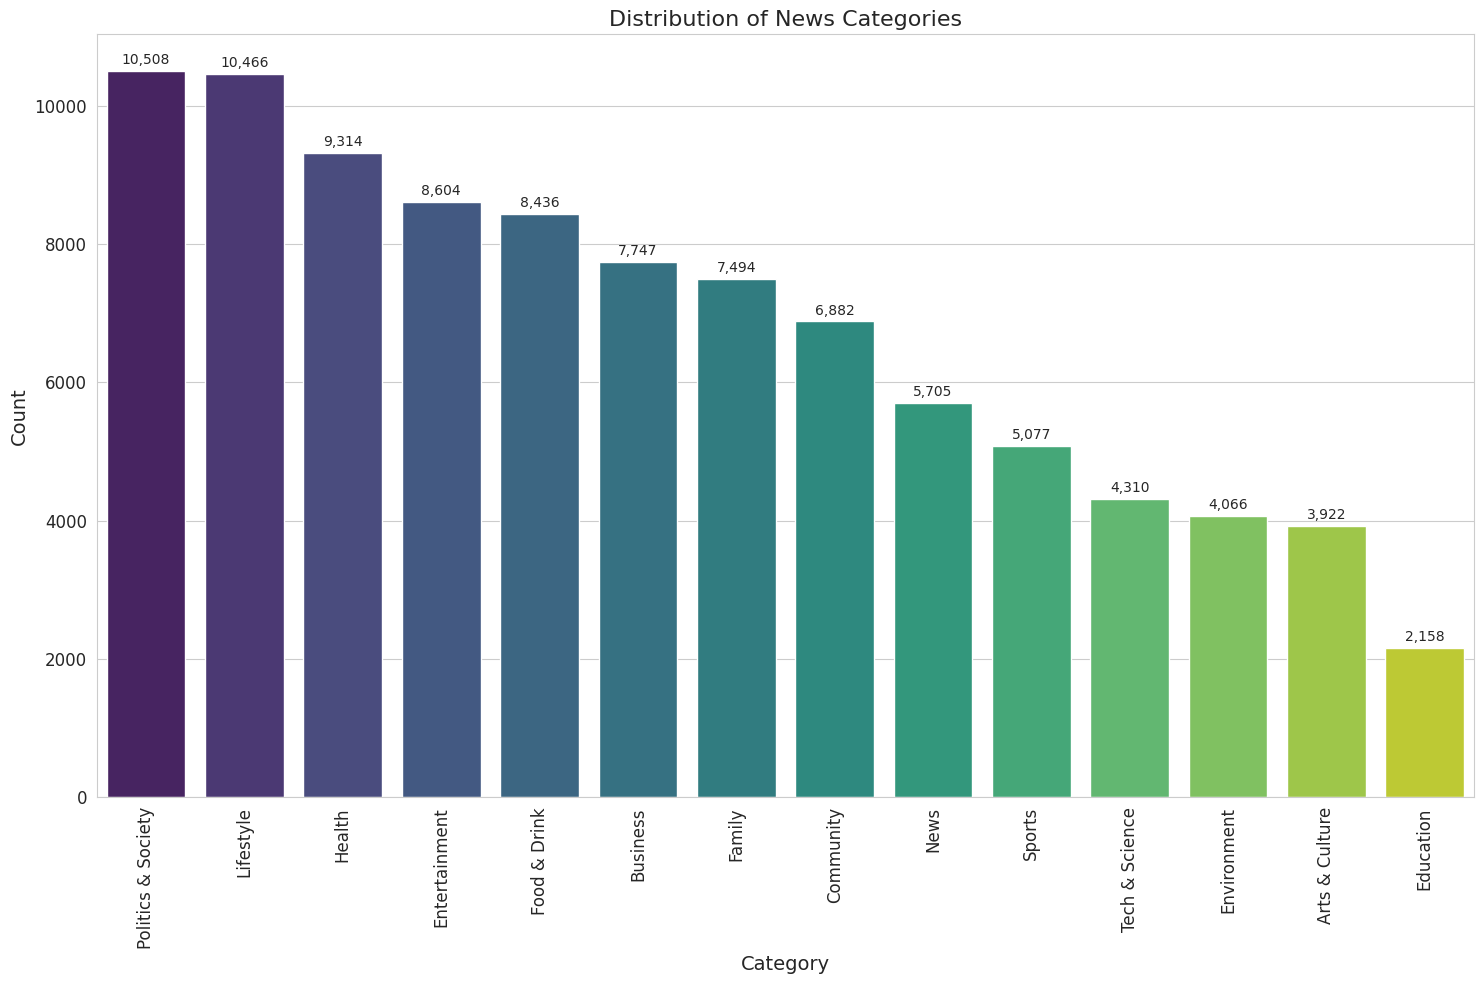

,Category,Percentage
0,Politics & Society,11.097382
1,Lifestyle,11.053026
2,Health,9.836412
3,Entertainment,9.086589
4,Food & Drink,8.909166
5,Business,8.181521
6,Family,7.914330
7,Community,7.268004
8,News,6.024987
9,Sports,5.361763


In [5]:
# Category distribution
category_counts = df['category'].value_counts()

# Plot category distribution
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of News Categories', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)

# Add count labels on top of each bar
for i, count in enumerate(category_counts.values):
    ax.text(i, count + 100, f"{count:,}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate category percentages
category_percentages = (category_counts / len(df) * 100).reset_index()
category_percentages.columns = ['Category', 'Percentage']
category_percentages.sort_values('Percentage', ascending=False).head(10)

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


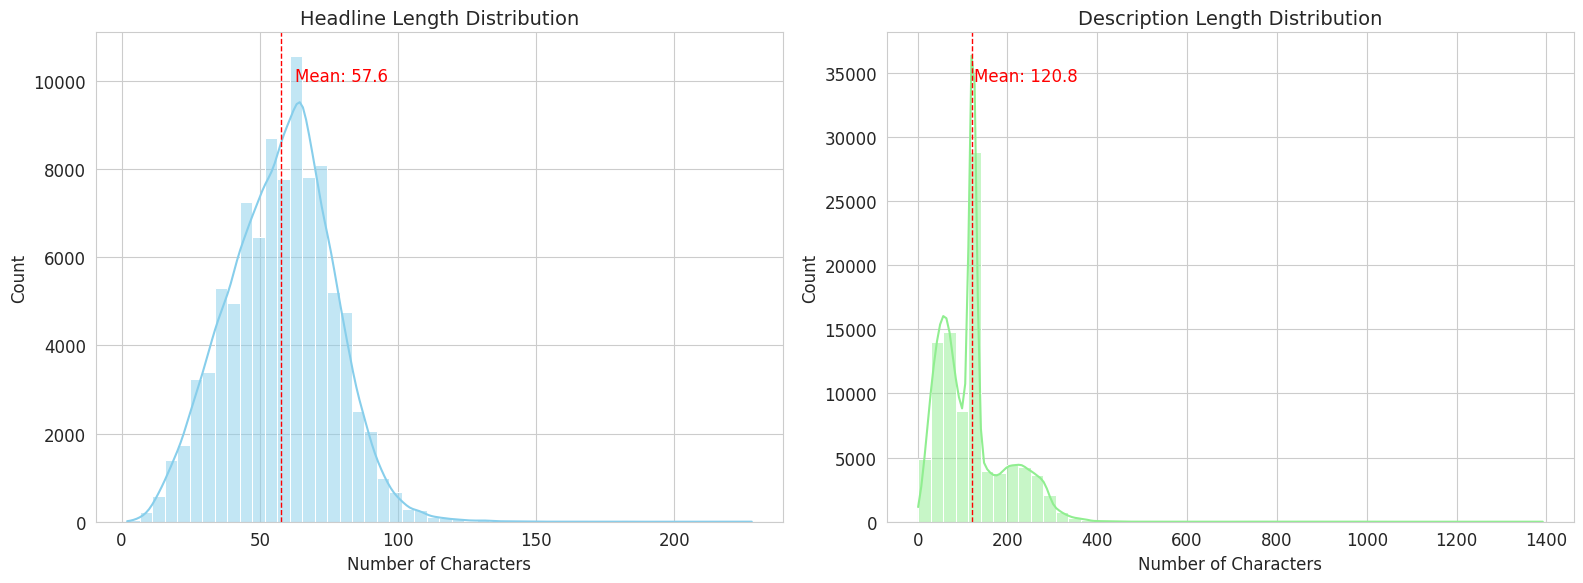

,Headline Length,Description Length
count,94689.000000,94689.000000
mean,57.595771,120.775043
std,18.819173,74.896436
min,2.000000,1.000000
25%,45.000000,65.000000
50%,59.000000,120.000000
75%,70.000000,140.000000
max,228.000000,1392.000000


In [6]:
# Character length analysis
df['headline_length'] = df['headline'].astype(str).apply(len)
df['description_length'] = df['short_description'].astype(str).apply(len)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Headline length distribution
sns.histplot(df['headline_length'], bins=50, kde=True, ax=ax1, color='skyblue')
ax1.set_title('Headline Length Distribution', fontsize=14)
ax1.set_xlabel('Number of Characters', fontsize=12)
ax1.axvline(df['headline_length'].mean(), color='red', linestyle='dashed', linewidth=1)
ax1.text(df['headline_length'].mean() + 5, ax1.get_ylim()[1] * 0.9, 
         f'Mean: {df["headline_length"].mean():.1f}', 
         color='red', fontsize=12)

# Description length distribution
sns.histplot(df['description_length'], bins=50, kde=True, ax=ax2, color='lightgreen')
ax2.set_title('Description Length Distribution', fontsize=14)
ax2.set_xlabel('Number of Characters', fontsize=12)
ax2.axvline(df['description_length'].mean(), color='red', linestyle='dashed', linewidth=1)
ax2.text(df['description_length'].mean() + 5, ax2.get_ylim()[1] * 0.9, 
         f'Mean: {df["description_length"].mean():.1f}', 
         color='red', fontsize=12)

plt.tight_layout()
plt.show()

# Summary statistics
length_stats = pd.DataFrame({
    'Headline Length': df['headline_length'].describe(),
    'Description Length': df['description_length'].describe()
})
length_stats

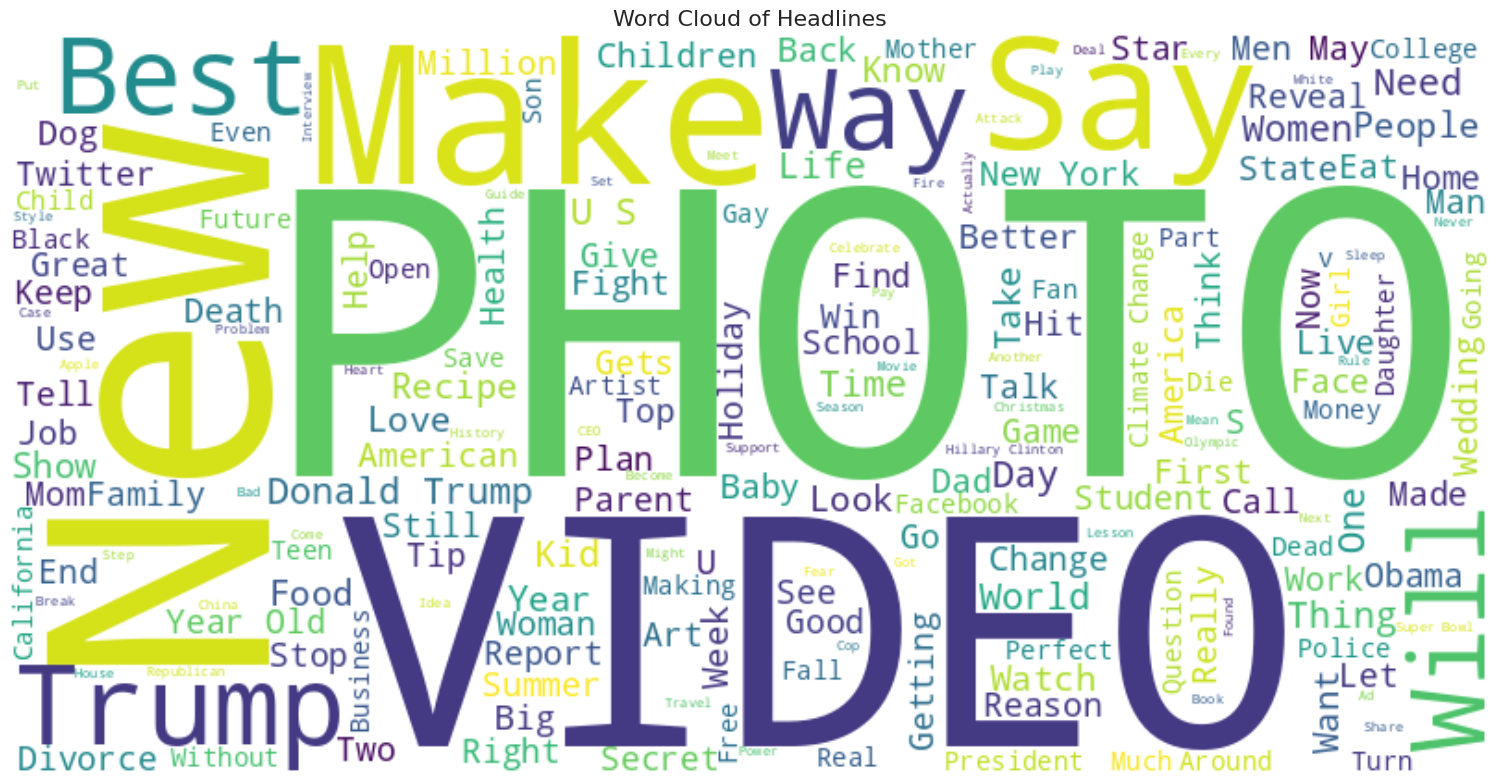

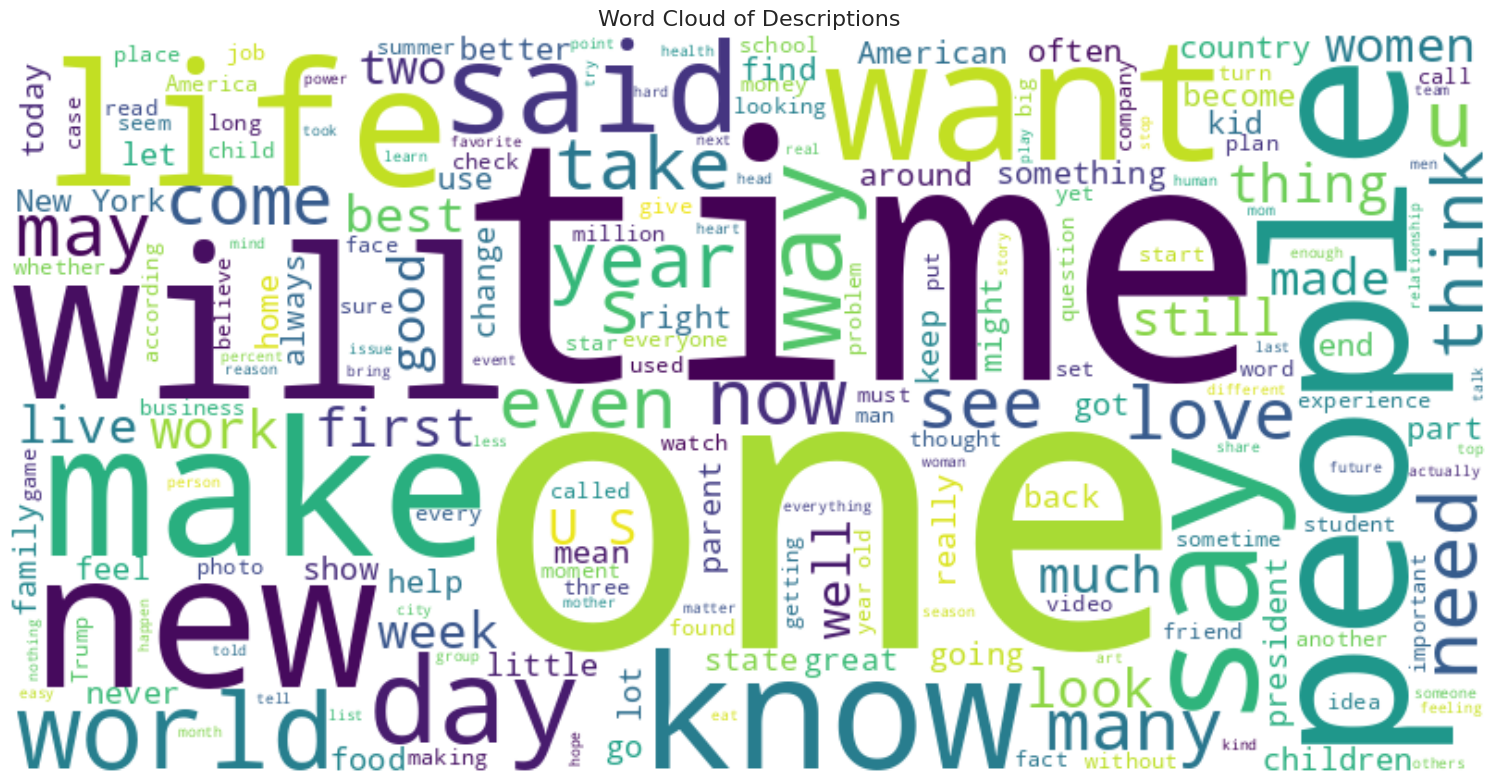

In [7]:
# Create word clouds for headlines and descriptions
try:
    from wordcloud import WordCloud
except ImportError:
    !pip install wordcloud
    from wordcloud import WordCloud

# Function to create word cloud
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=200, contour_width=3, contour_color='steelblue').generate(text)
    
    plt.figure(figsize=(16, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create word cloud for headlines
headlines_text = ' '.join(df['headline'].astype(str))
create_wordcloud(headlines_text, 'Word Cloud of Headlines')

# Create word cloud for descriptions
descriptions_text = ' '.join(df['short_description'].astype(str))
create_wordcloud(descriptions_text, 'Word Cloud of Descriptions')


- Loại bỏ stop words (từ dừng) và kết hợp 2 cột headline và short-description xử lí trước khi đưa vào mô hình

### 4.2. Tiền xử lí dữ liệu

**1. Tiền xử lý văn bản (Text Preprocessing)**

- **Loại bỏ Stop Words:** Loại bỏ các từ không mang nhiều ý nghĩa (như "and", "the", "of", "in") để giảm nhiễu và cải thiện hiệu quả học.
- **Chuyển văn bản về chữ thường:** Giảm sự phân biệt giữa các từ viết hoa và viết thường.
- **Xóa dấu câu và ký tự đặc biệt:** Loại bỏ các ký tự không cần thiết để làm sạch văn bản.
- **Tách từ ghép:** Phân tách các từ ghép thành các từ đơn để tăng độ chính xác khi vector hóa.
- **Kết hợp các trường dữ liệu:** Kết hợp các trường như "headline" và "short_description" thành một trường duy nhất để tạo ngữ cảnh phong phú hơn cho mô hình.

**2. Biểu diễn văn bản dưới dạng vector (Word Embedding)**

- Sử dụng mô hình Word2Vec để chuyển văn bản thành vector số, biểu diễn mỗi từ bằng Dense Vector.
- Mục đích: Học được ngữ cảnh của từ dựa trên mối quan hệ với các từ xung quanh.
- Tạo ra các vector có kích thước cố định nhưng mang nhiều ý nghĩa ngữ nghĩa, tốt hơn so với các phương pháp One-Hot Encoding hoặc TF-IDF rời rạc.
- Khả năng bắt được các mối quan hệ ngữ nghĩa như tính từ đồng nghĩa, từ trái nghĩa, hoặc các khái niệm gần nhau trong không gian ngữ nghĩa.

**3. Tạo tập dữ liệu huấn luyện và kiểm tra (Train/Test Split)**

- Tạo ma trận đặc trưng X từ các vector Word2Vec đã huấn luyện.
- Phân chia dữ liệu thành tập huấn luyện (train) và tập kiểm tra (test) để đánh giá hiệu suất mô hình.


In [8]:
# Load stopwords
with open("/kaggle/input/stopwords-en/stopwords-en.txt", encoding="utf-8") as f:
    stopwords = [x.strip() for x in f.readlines()]

# Hàm xử lý text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # bỏ dấu câu
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords]
    return tokens

# Kết hợp headline và description → xử lý
# Huấn luyện mô hình Word2Vec từ dữ liệu đã tokenized
# Tạo cột 'combined' để nối headline + short_description
df['combined'] = df['headline'].fillna('') + ' ' + df['short_description'].fillna('')

# Áp dụng clean_text để tạo cột 'tokens'
df['tokens'] = df['combined'].apply(clean_text)
print("Done!")

Done!


- Sử dụng mô hình Word2Vec để chuyển dữ liệu Text về Vector.
- Mục đích sử dụng Word2Vec: Biểu diễn dưới dạng dense vector, học được ngữ cảnh của câu hơn so với các phương pháp Embedding rời rạc.

In [9]:
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=5, min_count=2, workers=4, sg=1)

In [10]:
from sklearn.preprocessing import LabelEncoder

# Lấy embedding trung bình của mỗi văn bản (mean of word vectors)
def get_average_vector(tokens, model, vector_size):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

# Tạo ma trận đặc trưng X
X = np.array([get_average_vector(tokens, w2v_model, 300) for tokens in df['tokens']])

# Mã hóa nhãn
y = df['category'].values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

print("✅ Xây dựng xong X và chia tập train/test!")

✅ Xây dựng xong X và chia tập train/test!


In [11]:
print("Vector trung bình của câu 1 (tokens):")
print(df['tokens'].iloc[0])
print("\nVector biểu diễn:")
print(X[0])
print("\nKích thước vector:", X[0].shape)


Vector trung bình của câu 1 (tokens):
['american', 'airlines', 'flyer', 'charged', 'banned', 'life', 'punching', 'flight', 'attendant', 'video', 'subdued', 'passengers', 'crew', 'fled', 'aircraft', 'confrontation', 'attorneys', 'office', 'los', 'angeles']

Vector biểu diễn:
[-1.00008711e-01  1.39217481e-01  1.17896222e-01  6.92855939e-02
  1.77924514e-01 -1.29218951e-01  2.95979176e-02  1.62812456e-01
  2.44911425e-02  1.97364450e-01 -1.10271931e-01 -2.69461632e-01
  6.95993081e-02  1.68005556e-01 -5.86891100e-02 -3.60583290e-02
 -1.73498437e-01 -3.82901989e-02  8.94576162e-02  3.72275300e-02
 -1.99974831e-02 -1.62432700e-01 -6.80189505e-02 -3.43439393e-02
  2.83038877e-02  5.53917773e-02 -1.27234384e-01  4.51568067e-02
 -3.49398218e-02 -1.29874736e-01  2.12896895e-02 -3.87462638e-02
 -7.31934085e-02  1.05534177e-02 -1.12522207e-02  1.64495766e-01
  1.24695981e-02 -1.85465366e-01 -4.04576473e-02 -7.79453665e-02
 -5.47763333e-02  2.17713237e-01 -8.16869810e-02  3.52189839e-02
 -1.268469


Số lượng mẫu train: 75751
Số lượng mẫu test: 18938


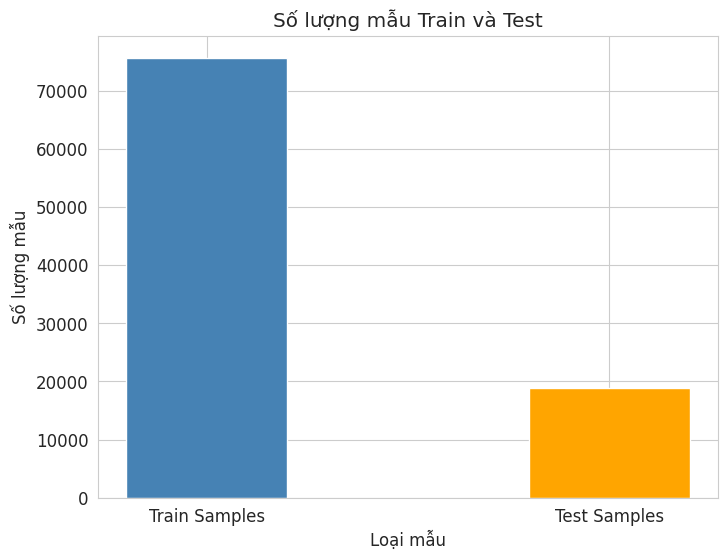

In [12]:
import matplotlib.pyplot as plt

# Giả sử X_train và X_test đã được định nghĩa
print("\nSố lượng mẫu train:", len(X_train))
print("Số lượng mẫu test:", len(X_test))

# Vẽ biểu đồ số lượng mẫu train và test
labels = ['Train Samples', 'Test Samples']
counts = [len(X_train), len(X_test)]

plt.figure(figsize=(8, 6))
plt.bar(labels, counts, width=0.4, color=['steelblue', 'orange'])
plt.title('Số lượng mẫu Train và Test')
plt.xlabel('Loại mẫu')
plt.ylabel('Số lượng mẫu')
plt.show()


- **Nhận xét về dữ liệu:** Dữ liệu huấn luyện có sự mất cân bằng giữa các nhãn, gây khó khăn cho mô hình khi phân loại chính xác các lớp thiểu số.

- **Giải pháp khắc phục:** Áp dụng **SMOTE** (Synthetic Minority Over-sampling Technique) để tạo thêm mẫu từ các lớp thiểu số, cân bằng lại phân phối dữ liệu và cải thiện hiệu suất mô hình.

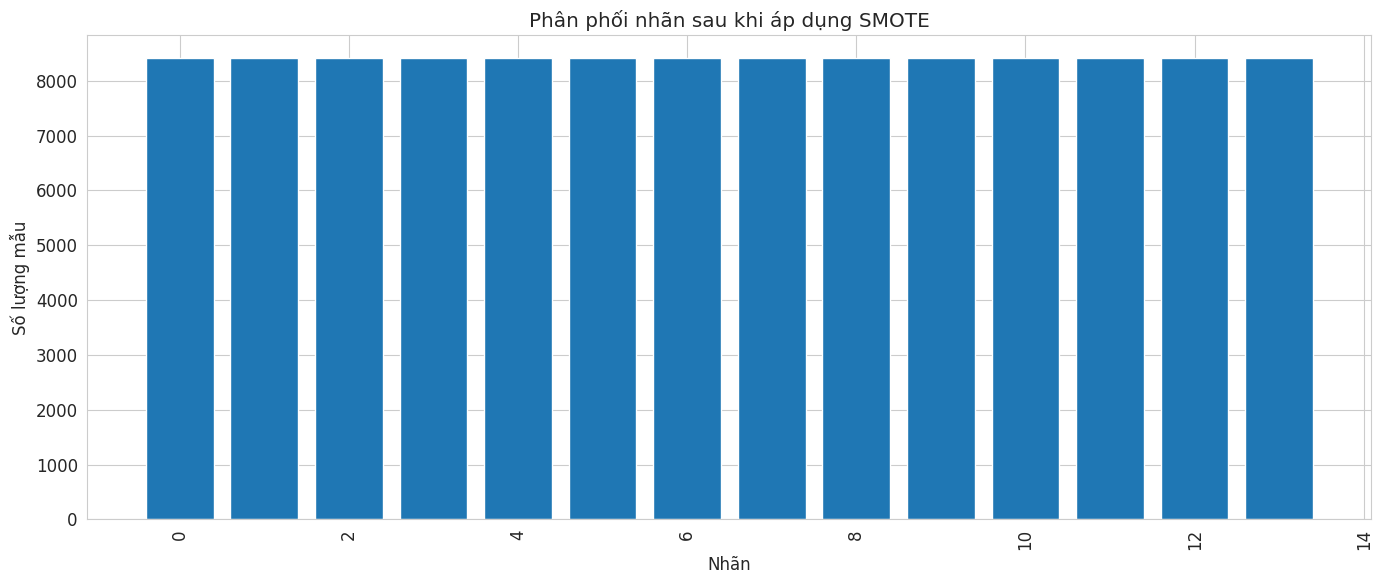

In [17]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Khởi tạo SMOTE
sm = SMOTE(random_state=42)

# Áp dụng SMOTE lên tập train
X_train, y_train = sm.fit_resample(X_train, y_train)

from collections import Counter
import matplotlib.pyplot as plt

# Đếm số lượng mẫu theo từng nhãn sau khi resample
after_counts = Counter(y_train)

# Sắp xếp nhãn để hiển thị đẹp
labels_sorted = sorted(after_counts.keys())
values_sorted = [after_counts[label] for label in labels_sorted]

# Vẽ biểu đồ cột
plt.figure(figsize=(14, 6))
plt.bar(labels_sorted, values_sorted)
plt.title("Phân phối nhãn sau khi áp dụng SMOTE")
plt.xlabel("Nhãn")
plt.ylabel("Số lượng mẫu")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



- Ví dụ: in dòng đầu tiên trong tập huấn luyện sau khi SMOTE

In [18]:
print("Vector trung bình của mẫu SMOTE hoá [0]:")
print(X_train[0])  # vector biểu diễn
print("\nKích thước vector:", X_train[0].shape)
print("\nNhãn tương ứng:", y_train.iloc[0] if hasattr(y_train, "iloc") else y_train[0])


Vector trung bình của mẫu SMOTE hoá [0]:
[-0.13251927  0.20969673  0.05323979  0.05859867  0.03263597 -0.09816392
  0.0697749   0.17311294 -0.00424479  0.2230702  -0.06470037 -0.33788472
  0.03079129  0.08139721 -0.04303686 -0.06995504  0.02039997  0.01840113
 -0.03495318  0.04045691 -0.16206832 -0.08992828 -0.08874295 -0.00699073
 -0.0503574  -0.0008462  -0.20132935  0.01145327 -0.0966486  -0.19217022
 -0.05404137 -0.12698236 -0.07963613 -0.03203001 -0.07644203  0.1935185
  0.13229649 -0.22065496 -0.11741009  0.13351884 -0.04396357  0.10861602
 -0.06309583  0.02213173  0.02961786  0.16132939  0.13437973 -0.01120392
  0.03267711  0.12862296 -0.03746701 -0.01259065 -0.09089644 -0.06670508
  0.02389231  0.19761434  0.18393415  0.00078492  0.23725188 -0.05241924
 -0.04022111 -0.08920339 -0.14747474 -0.00980102  0.18279119 -0.13094072
 -0.0556787   0.24846832 -0.0104677   0.11338677 -0.07741907  0.11750592
  0.10404827  0.02888664  0.03058256  0.21573161 -0.05100049 -0.09189656
  0.0050573

## 4.2. Xây dựng mô hình bài toán

**Phương pháp huấn luyện mô hình Ensemble Learning với GridSearchCV**
**1. Các mô hình cơ sở**

- **Logistic Regression (LR):** Mô hình tuyến tính đơn giản, phổ biến cho các bài toán phân loại nhị phân.
- **Support Vector Machine (SVM):** Mô hình mạnh mẽ cho phân loại với khả năng tối ưu biên quyết định.
- **Random Forest (RF):** Mô hình dựa trên tập hợp nhiều cây quyết định (Decision Trees), giúp giảm hiện tượng overfitting.
- **Naive Bayes (NB):** Mô hình dựa trên định lý Bayes với giả định độc lập có điều kiện giữa các đặc trưng, thường hiệu quả với dữ liệu có cấu trúc đơn giản.

**2. Tối ưu hóa tham số bằng GridSearchCV**
- Sử dụng **GridSearchCV** để tìm tham số tối ưu cho từng mô hình cơ sở.
- **GridSearchCV** thực hiện tìm kiếm tham số bằng cách thử tất cả các tổ hợp tham số đã định nghĩa trong một lưới (grid), sau đó đánh giá bằng **k-fold cross-validation**.
- Quá trình này giúp xác định tham số tốt nhất cho từng mô hình, đảm bảo hiệu suất cao nhất.

**3. Tạo mô hình Ensemble với Soft Voting**
- Sử dụng **VotingClassifier** để kết hợp đầu ra từ các mô hình cơ sở.
- Phương pháp **Soft Voting** sử dụng xác suất dự đoán của từng mô hình để đưa ra kết quả cuối cùng, giúp tận dụng thông tin từ tất cả các mô hình thành phần.
- **Soft Voting** thường cho độ chính xác cao hơn Hard Voting, đặc biệt khi các mô hình cơ sở có độ chính xác khác nhau.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [45]:
class LogisticRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.w = [0.0 for _ in range(n_features)]
        for _ in range(self.n_iters):
            dw = [0.0] * n_features
            db = 0.0
            for xi, yi in zip(X, y):
                linear_model = sum(wi * xi_j for wi, xi_j in zip(self.w, xi)) + self.b
                y_pred = 1 / (1 + math.exp(-linear_model))
                error = y_pred - yi
                for j in range(n_features):
                    dw[j] += (1 / n_samples) * error * xi[j]
                db += (1 / n_samples) * error
            for j in range(n_features):
                self.w[j] -= self.lr * dw[j]
            self.b -= self.lr * db

    def predict(self, X):
        return [1 if (1 / (1 + math.exp(-sum(wi * xi_j for wi, xi_j in zip(self.w, xi)) + self.b))) >= 0.5 else 0 for xi in X]


In [ ]:
class GaussianNB:
    def __init__(self):
        self.classes = []
        self.priors = {}
        self.mean = {}
        self.var = {}

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.classes = set(y)
        data = defaultdict(list)
        for xi, yi in zip(X, y):
            data[yi].append(xi)
        for c, samples in data.items():
            self.priors[c] = len(samples) / n_samples
            features = list(zip(*samples))
            self.mean[c] = [sum(f)/len(f) for f in features]
            self.var[c] = [sum((val - m)**2 for val in f)/len(f) for f, m in zip(features, self.mean[c])]

    def _pdf(self, x, mean, var):
        eps = 1e-9
        coeff = 1.0 / math.sqrt(2.0 * math.pi * (var + eps))
        exponent = math.exp(-((x-mean)**2) / (2 * (var + eps)))
        return coeff * exponent

    def predict(self, X):
        preds = []
        for xi in X:
            posteriors = {}
            for c in self.classes:
                log_prob = math.log(self.priors[c])
                for i, x_val in enumerate(xi):
                    log_prob += math.log(self._pdf(x_val, self.mean[c][i], self.var[c][i]))
                posteriors[c] = log_prob
            preds.append(max(posteriors, key=posteriors.get))
        return preds

In [47]:
class LinearSVM:
    def __init__(self, lr=0.001, n_iters=1000, C=1.0):
        self.lr = lr
        self.n_iters = n_iters
        self.C = C
        self.w = None
        self.b = 0

    def fit(self, X, y):
        n_samples, n_features = len(X), len(X[0])
        self.w = [0.0 for _ in range(n_features)]
        for _ in range(self.n_iters):
            dw = [0.0] * n_features
            db = 0.0
            for xi, yi in zip(X, y):
                condition = yi * (sum(wi * xi_j for wi, xi_j in zip(self.w, xi)) + self.b)
                if condition < 1:
                    for j in range(n_features):
                        dw[j] += -yi * xi[j]
                    db += -yi
                for j in range(n_features):
                    dw[j] += 2 * self.w[j]
            for j in range(n_features):
                self.w[j] -= self.lr * (dw[j] / n_samples)
            self.b -= self.lr * (db / n_samples)

    def predict(self, X):
        preds = [sum(wi * xi_j for wi, xi_j in zip(self.w, xi)) + self.b for xi in X]
        return [1 if p >= 0 else -1 for p in preds]


In [48]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=5, min_samples_split=2, sample_size=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.sample_size = sample_size
        self.trees = []

    def _sample(self, X, y):
        n = len(X) if self.sample_size is None else self.sample_size
        idxs = [random.randrange(len(X)) for _ in range(n)]
        return [X[i] for i in idxs], [y[i] for i in idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            X_samp, y_samp = self._sample(X, y)
            tree = DecisionTree(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
            tree.tree = tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = [tree.predict(X) for tree in self.trees]
        preds = []
        for i in range(len(X)):
            votes = [tree_preds[t][i] for t in range(self.n_trees)]
            preds.append(Counter(votes).most_common(1)[0][0])
        return preds

In [44]:
import math
import random
from collections import Counter, defaultdict
import time
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

# Giữ nguyên dữ liệu X_train đã được cắt mẫu
X_train = X_train
y_train = y_train
X_test = X_test
y_test = y_test

# Khởi tạo các mô hình cơ sở
models = [LogisticRegression(), GaussianNB(), LinearSVM(), RandomForest()]

# Tạo mô hình ensemble với Voting Classifier (bỏ GradientBoostingClassifier)
ensemble = VotingClassifier(estimators=[
    ('lr', models[0]), 
    ('nb', models[1]), 
    ('svm', models[2]), 
    ('rf', models[3])], 
    voting='soft')

# Huấn luyện mô hình ensemble trực tiếp mà không dùng GridSearchCV
start_time = time.time()
ensemble.fit(X_train, y_train)
end_time = time.time()
print(f"⏱️ Thời gian huấn luyện (không GridSearchCV): {end_time - start_time:.2f} giây")

# Đánh giá trên tập train
y_train_pred = ensemble.predict(X_train)
y_train_proba = ensemble.predict_proba(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_loss = log_loss(y_train, y_train_proba)
print(f"📈 Train Accuracy: {train_accuracy:.2f}")
print(f"📉 Train Log Loss : {train_loss:.4f}")

# Đánh giá trên tập test
y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_loss = log_loss(y_test, y_proba)
print(f"Test Accuracy : {test_accuracy:.2f}")
print(f"Test Log Loss : {test_loss:.4f}")

# Báo cáo chi tiết
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Huấn luyện với GridSearchCV
param_grid = {
    'voting': ['hard', 'soft'],
    'weights': [[1, 1, 1, 1], [2, 1, 1, 1], [1, 2, 1, 1], [1, 1, 2, 1], [1, 1, 1, 2]]
}

grid_search = GridSearchCV(ensemble, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

print(f"Thời gian huấn luyện (GridSearchCV): {end_time - start_time:.2f} giây")
print(f"Best Params: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

# Đánh giá trên tập test sau khi tối ưu
best_ensemble = grid_search.best_estimator_
y_pred_gs = best_ensemble.predict(X_test)
y_proba_gs = best_ensemble.predict_proba(X_test)

test_accuracy_gs = accuracy_score(y_test, y_pred_gs)
test_loss_gs = log_loss(y_test, y_proba_gs)
print(f"Test Accuracy (GridSearchCV) : {test_accuracy_gs:.2f}")
print(f"Test Log Loss (GridSearchCV) : {test_loss_gs:.4f}")

# Báo cáo chi tiết sau tối ưu
print("Classification Report (GridSearchCV):")
print(classification_report(y_test, y_pred_gs))

✅ Done training SVM (multi-class)
⏱️ Thời gian huấn luyện: 36653 giây
📈 Train Accuracy: 0.85
📉 Train Log Loss : 0.85
🎯 Test Accuracy : 0.77
📉 Test Log Loss : 1.1

📊 Classification Report:

          0       0.74      0.84      0.82      784
          1       0.78      0.89      0.81      1550
          2       0.79      0.86      0.74      1376
          3       0.81      0.8      0.72      432
          4       0.77      0.77      0.81      1721
          5       0.71      0.82      0.81      813
          6       0.84      0.78      0.84      1499
          7       0.82      0.85      0.85      1687
          8       0.83      0.79      0.86      1863
          9       0.77      0.82      0.88      2093
         10       0.82      0.87      0.74      1141
         11       0.78      0.83      0.79      2102
         12       0.77      0.81      0.79      1015
         13       0.75      0.8      0.78      862

    accuracy                           0.8     18938
   macro avg       0.

In [ ]:
import pickle

# Ghi mô hình ensemble vào file
with open("ensemble_classifier_pipeline.pkl", "wb") as f:
    pickle.dump(ensemble_model, f)

print("✅ Đã lưu mô hình ensemble vào 'ensemble_classifier_pipeline.pkl'")

# Lưu LabelEncoder nếu bạn có sử dụng LabelEncoder (giả sử bạn có một encoder)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

print("✅ Đã lưu LabelEncoder vào 'label_encoder.pkl'")

# Lưu mô hình Word2Vec (nếu bạn sử dụng Word2Vec)
w2v_model.save("word2vec_embedding.model")
print("✅ Đã lưu mô hình Word2Vec vào 'word2vec_embedding.model'")


### 4.3. Dự đoán và đánh giá thực tế

In [3]:

# Sửa hàm predict_category
def predict_category(text, w2v_model, vector_size=300, clf=svm_clf):
    # Làm sạch văn bản
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Bỏ dấu câu
    tokens = text.split()
    tokens = [w for w in tokens if w not in stopwords]

    # Vector hóa bằng Word2Vec (trung bình vector các từ)
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    if len(vectors) == 0:
        vector = np.zeros(vector_size).reshape(1, -1)
    else:
        vector = np.mean(vectors, axis=0).reshape(1, -1)

    # Dự đoán nhãn
    label_id = clf.predict(vector)[0]
    label_name = label_encoder.inverse_transform([label_id])[0]

    return label_name


In [4]:
test_sentence = "Schools are now offering yoga and mindfulness classes to improve student well-being.."
predicted_category = predict_category(test_sentence, w2v_model)
print(f"📝 Câu: {test_sentence}")
print(f"📂 Dự đoán thuộc nhãn: {predicted_category}")


📝 Câu: Schools are now offering yoga and mindfulness classes to improve student well-being..
📂 Dự đoán thuộc nhãn: Education


### 4.4. Cập nhật phân công, khối lượng công việc
<!-- công việc của các thành viên, tỷ lệ đóng góp của các thành viên -->

#### 1. Trần Quang Huy
- Code lại các thuật toán của từng model để sử dụng
- Thiết kế model Emsemble Learning
- Lựa chọn mô hình tối ưu 
#### 2. Nguyễn Lương Hoàng Tùng
- Code lại các thuật toán của từng model để sử dụng
- Đánh giá hiệu suất mô hình
- Tối ưu mô hình để tìm tham số tốt nhất
#### 3. Ngô Mạnh Hùng
- Tiền xử lí dữ liệu
- Viết báo cáo dự án
- Kiểm tra và đánh giá chất lượng dữ liệu.
#### 4. Ôn Quang Tùng
- Tìm bộ dữ liệu data training/test trên các website
- Thiết kế giao diện website cho dự án chạy trên local